# Importing libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Loading dataframe

In [105]:
# Load csv into a dataframe
df = pd.read_csv("data/merged_table.csv")

# Selecting time range (exclude the test set data)

In [106]:
# Set the Year_Quarter column as the index for easy operations
df.set_index('Year_Quarter', inplace=True)

# Filter the index to include only values between 2008 and 2021 (inclusive)
df_filtered = df[(df.index >= '2008') & (df.index <= '2022')]

# General view of data & missing data
There is not missing data, the selected time frame is succesfully applied, no strange things to see

In [107]:
# Overview of the DataFrame
df_filtered.info()

# Missing values count and percentage
missing_counts = df_filtered.isnull().sum()
missing_percentage = (df_filtered.isnull().mean() * 100).sort_values(ascending=False)

# Display columns with missing values
print("\nColumns with missing values and their percentages:")
print(missing_percentage[missing_percentage > 0])

# Quick statistical summary
print("\nStatistical summary of the dataset:")
display(df_filtered.describe(include='all'))

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
display(df_filtered.head())

# Display the first few rows of the dataset
print("\nLast few rows of the dataset:")
display(df_filtered.tail())

# Check the shape of the dataset
print("\nShape of the dataset:")
print(f"Rows: {df_filtered.shape[0]}, Columns: {df_filtered.shape[1]}")


<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 2008-Q1 to 2021-Q4
Columns: 102 entries, BedrijfstakkenBranchesSBI2008 to precipitation
dtypes: float64(100), int64(1), object(1)
memory usage: 135.2+ KB

Columns with missing values and their percentages:
Series([], dtype: float64)

Statistical summary of the dataset:


,BedrijfstakkenBranchesSBI2008,80072ned_Ziekteverzuimpercentage_1,83451NED_BanenMetSeizoenscorrectie_1,83451NED_BanenZonderSeizoenscorrectie_2,83451NED_ArbeidsvolumeMetSeizoenscorrectie_3,83451NED_ArbeidsvolumeZonderSeizoenscorrectie_4,83451NED_MaandloonInclusiefOverwerk_5,83451NED_MaandloonExclusiefOverwerk_6,85928NED_PrijsindexArbeid_1,85928NED_JaarmutatiePrijsVanArbeid_2,...,80072ned_Ziekteverzuimpercentage_1_lag_5,80072ned_Ziekteverzuimpercentage_1_lag_6,80072ned_Ziekteverzuimpercentage_1_lag_7,80072ned_Ziekteverzuimpercentage_1_lag_8,covid_19,airpressure,maximum_temperatures,mean_temperatures,minimum_temperatures,precipitation
count,168,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C Industrie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.675595,16718.333333,16718.380952,12273.589286,12273.267857,137023.797619,135315.976190,87.779762,1.935119,...,4.567262,4.550000,4.535119,4.520238,0.142857,10152.017857,147.238095,107.184524,63.994048,704.898810
std,NaN,1.056403,3897.870926,3898.402852,1577.441696,1579.369564,21752.905229,20775.543998,6.075577,1.679897,...,1.000030,1.000419,0.997970,0.987743,0.350973,29.938354,57.171651,49.023230,40.392460,229.364678
min,NaN,2.800000,10900.000000,10921.000000,9775.000000,9784.000000,107804.000000,107351.000000,74.500000,-5.500000,...,2.800000,2.800000,2.800000,2.800000,0.000000,10083.333333,48.333333,20.666667,-8.333333,333.333333
25%,NaN,3.675000,11460.500000,11451.250000,10314.750000,10315.000000,119063.750000,118059.500000,83.175000,0.875000,...,3.500000,3.500000,3.500000,3.500000,0.000000,10139.000000,96.000000,66.166667,31.833333,530.833333
50%,NaN,4.900000,18832.000000,18814.000000,12941.000000,12922.000000,132159.000000,131454.000000,87.450000,2.150000,...,4.800000,4.800000,4.800000,4.800000,0.000000,10153.333333,145.333333,107.166667,64.333333,686.166667
75%,NaN,5.400000,19605.500000,19657.000000,13385.250000,13369.000000,150266.000000,148147.250000,92.050000,3.025000,...,5.325000,5.300000,5.300000,5.300000,0.000000,10170.416667,205.416667,155.583333,100.500000,912.333333



First few rows of the dataset:


,BedrijfstakkenBranchesSBI2008,80072ned_Ziekteverzuimpercentage_1,83451NED_BanenMetSeizoenscorrectie_1,83451NED_BanenZonderSeizoenscorrectie_2,83451NED_ArbeidsvolumeMetSeizoenscorrectie_3,83451NED_ArbeidsvolumeZonderSeizoenscorrectie_4,83451NED_MaandloonInclusiefOverwerk_5,83451NED_MaandloonExclusiefOverwerk_6,85928NED_PrijsindexArbeid_1,85928NED_JaarmutatiePrijsVanArbeid_2,...,80072ned_Ziekteverzuimpercentage_1_lag_5,80072ned_Ziekteverzuimpercentage_1_lag_6,80072ned_Ziekteverzuimpercentage_1_lag_7,80072ned_Ziekteverzuimpercentage_1_lag_8,covid_19,airpressure,maximum_temperatures,mean_temperatures,minimum_temperatures,precipitation
Year_Quarter,,,,,,,,,,,,,,,,,,,,,
2008-Q1,C Industrie,5.4,12198.0,12186.0,10997.0,10994.0,133808.0,130894.0,78.5,3.9,...,5.9,5.0,5.4,6.1,0,10143.0,91.333333,58.333333,23.666667,758.000000
2008-Q1,G Handel,3.7,18644.0,18547.0,13323.0,13201.0,111633.0,109999.0,80.4,2.4,...,3.3,2.9,3.1,3.5,0,10143.0,91.333333,58.333333,23.666667,758.000000
2008-Q1,Q Gezondheids- en welzijnszorg,6.0,17568.0,17535.0,12161.0,12131.0,107804.0,107351.0,74.5,3.3,...,5.4,4.5,5.2,6.0,0,10143.0,91.333333,58.333333,23.666667,758.000000
2008-Q2,C Industrie,4.8,12218.0,12238.0,11005.0,11006.0,134681.0,131518.0,79.8,5.0,...,5.4,5.9,5.0,5.4,0,10143.0,188.666667,137.000000,80.000000,354.333333
2008-Q2,G Handel,3.2,18771.0,18772.0,13384.0,13360.0,112189.0,110428.0,81.2,2.9,...,3.6,3.3,2.9,3.1,0,10143.0,188.666667,137.000000,80.000000,354.333333



Last few rows of the dataset:


,BedrijfstakkenBranchesSBI2008,80072ned_Ziekteverzuimpercentage_1,83451NED_BanenMetSeizoenscorrectie_1,83451NED_BanenZonderSeizoenscorrectie_2,83451NED_ArbeidsvolumeMetSeizoenscorrectie_3,83451NED_ArbeidsvolumeZonderSeizoenscorrectie_4,83451NED_MaandloonInclusiefOverwerk_5,83451NED_MaandloonExclusiefOverwerk_6,85928NED_PrijsindexArbeid_1,85928NED_JaarmutatiePrijsVanArbeid_2,...,80072ned_Ziekteverzuimpercentage_1_lag_5,80072ned_Ziekteverzuimpercentage_1_lag_6,80072ned_Ziekteverzuimpercentage_1_lag_7,80072ned_Ziekteverzuimpercentage_1_lag_8,covid_19,airpressure,maximum_temperatures,mean_temperatures,minimum_temperatures,precipitation
Year_Quarter,,,,,,,,,,,,,,,,,,,,,
2021-Q3,G Handel,4.3,20522.0,20503.0,14388.0,14477.0,144786.0,143478.0,99.6,1.6,...,4.3,4.8,3.9,3.5,1,10164.666667,214.666667,169.333333,122.333333,727.0
2021-Q3,Q Gezondheids- en welzijnszorg,6.3,21629.0,21489.0,14819.0,14730.0,145610.0,145261.0,100.3,3.2,...,6.1,6.6,5.9,5.3,1,10164.666667,214.666667,169.333333,122.333333,727.0
2021-Q4,C Industrie,6.5,11410.0,11415.0,10302.0,10303.0,192838.0,188824.0,100.0,0.8,...,5.4,5.8,6.7,5.6,1,10148.000000,111.666667,81.333333,48.000000,920.0
2021-Q4,G Handel,4.9,20564.0,20613.0,14477.0,14480.0,143408.0,141961.0,100.0,2.2,...,4.0,4.3,4.8,3.9,1,10148.000000,111.666667,81.333333,48.000000,920.0
2021-Q4,Q Gezondheids- en welzijnszorg,7.5,21749.0,21821.0,14893.0,15009.0,151843.0,151409.0,100.0,1.6,...,5.9,6.1,6.6,5.9,1,10148.000000,111.666667,81.333333,48.000000,920.0



Shape of the dataset:
Rows: 168, Columns: 102


# Visualization
- Sick leave data shows a clear seasonal pattern
- Temperature data reflects a similar seasonal pattern
- Sick leave also seems to have a slowly upward trend
- Number of natural persons and rechtspersonen shows a similar pattern
- Many features show a completely different pattern than sick leave

In [ ]:
batch_size = 5
numerical_columns = df_filtered.select_dtypes(include='number').columns

# Group by 'BedrijfstakkenBranchesSBI2008' and plot for each industry
for industry, group in df_filtered.groupby('BedrijfstakkenBranchesSBI2008'):
    print(f"Processing industry: {industry}")
    
    # Iterate through batches of numerical columns
    for i in range(0, len(numerical_columns), batch_size):
        batch_columns = numerical_columns[i:i + batch_size]
        
        # Plot the selected batch for the current industry group
        group[batch_columns].plot(
            subplots=True, 
            figsize=(12, 8), 
            title=f'{industry} - Time Series Trends for Batch {i//batch_size + 1}'
        )
        plt.tight_layout()
        plt.show()

## Correlation

In [108]:
# Define the target variable and industry column
target_column = '80072ned_Ziekteverzuimpercentage_1'  # Replace with your target variable column
industry_column = 'BedrijfstakkenBranchesSBI2008'

# Set the correlation threshold
threshold = 0.7

# Dictionary to store selected columns for each industry
selected_columns_by_industry = {}

# List to store all unique selected columns across industries
all_selected_columns = []

# Get the unique industries
industries = df_filtered[industry_column].unique()

# Iterate over each industry and calculate correlation
for industry in industries:
    # Filter the DataFrame for the current industry
    industry_data = df_filtered[df_filtered[industry_column] == industry]
    
    # Select only numeric columns
    numeric_data = industry_data.select_dtypes(include='number')
    
    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Sort features by their absolute correlation with the target
    correlation_with_target = correlation_matrix[target_column].abs().sort_values(ascending=False)
    
    # Display columns with correlation > threshold
    filtered_columns = correlation_with_target[correlation_with_target > threshold]
    print(f"\nColumns with correlation > {threshold} for {industry}:\n")
    print(filtered_columns)
    
    # Add selected columns to the industry-specific dictionary
    selected_columns_by_industry[industry] = filtered_columns.index.tolist()
    
    # Add columns to the master list
    all_selected_columns.extend(filtered_columns.index.tolist())

# Remove duplicates from the combined list
all_selected_columns = list(set(all_selected_columns))

# Display the combined list of selected columns
print("\nAll selected columns across industries:")
print(all_selected_columns)



Columns with correlation > 0.7 for C Industrie:

80072ned_Ziekteverzuimpercentage_1          1.000000
80072ned_Ziekteverzuimpercentage_1_lag_4    0.815258
Name: 80072ned_Ziekteverzuimpercentage_1, dtype: float64

Columns with correlation > 0.7 for G Handel:

80072ned_Ziekteverzuimpercentage_1                 1.000000
80072ned_Ziekteverzuimpercentage_1_lag_4           0.895844
83451NED_ArbeidsvolumeMetSeizoenscorrectie_3       0.813482
covid_19                                           0.808335
80072ned_Ziekteverzuimpercentage_1_lag_8           0.792679
81588NED_k_2000WerkzamePersonenOfMeer_15           0.787598
81588NED_k_50Tot250WerkzamePersonen_20             0.784068
81589NED_k_50Tot100WerkzamePersonen_8              0.777332
81588NED_k_50Tot100WerkzamePersonen_8              0.777332
81588NED_Eenmanszaak_22                            0.771786
81588NED_OverigOfOnbekend_32                       0.766204
83451NED_BanenMetSeizoenscorrectie_1               0.760977
81588NED_k_100Tot150

In [109]:
# Add the industry column explicitly to the selected columns
industry_column = 'BedrijfstakkenBranchesSBI2008'  # Replace with your actual industry column name
if industry_column not in all_selected_columns:
    all_selected_columns.append(industry_column)

# Create a new DataFrame with the selected columns and the industry column
selected_df = df_filtered[all_selected_columns]

# Display the shape and first few rows of the new DataFrame
print(f"New DataFrame shape: {selected_df.shape}")
selected_df.head()

New DataFrame shape: (168, 32)


,80072ned_Ziekteverzuimpercentage_1,81588NED_TotaalNatuurlijkePersonen_21,83451NED_BanenMetSeizoenscorrectie_1,81589NED_NatuurlijkePersonen_12,80072ned_Ziekteverzuimpercentage_1_lag_3,81588NED_k_1WerkzaamPersoon_2,covid_19,81588NED_TotaalRechtspersonen_26,81589NED_k_100WerkzamePersonenOfMeer_9,83451NED_ArbeidsvolumeMetSeizoenscorrectie_3,...,81589NED_Rechtspersonen_13,81589NED_k_0Tot250WerkzamePersonen_11,81589NED_TotaalBedrijven_1,81588NED_OverigOfOnbekend_32,83451NED_BanenZonderSeizoenscorrectie_2,83451NED_ArbeidsvolumeZonderSeizoenscorrectie_4,83451NED_MaandloonExclusiefOverwerk_6,81588NED_Eenmanszaak_22,81588NED_k_50Tot250WerkzamePersonen_20,BedrijfstakkenBranchesSBI2008
Year_Quarter,,,,,,,,,,,,,,,,,,,,,
2008-Q1,5.4,32005.0,12198.0,32005.0,4.7,26170.0,0,18670.0,1330.0,10997.0,...,18670.0,50210.0,50675.0,175.0,12186.0,10994.0,130894.0,24705.0,2120.0,C Industrie
2008-Q1,3.7,148900.0,18644.0,148900.0,3.2,113800.0,0,52685.0,985.0,13323.0,...,52685.0,201265.0,201585.0,945.0,18547.0,13201.0,109999.0,108560.0,1985.0,G Handel
2008-Q1,6.0,34335.0,17568.0,34335.0,5.1,27145.0,0,12670.0,1095.0,12161.0,...,12670.0,46365.0,47005.0,60.0,17535.0,12131.0,107351.0,24265.0,935.0,Q Gezondheids- en welzijnszorg
2008-Q2,4.8,31955.0,12218.0,31955.0,4.3,26255.0,0,18645.0,1325.0,11005.0,...,18645.0,50135.0,50600.0,175.0,12238.0,11006.0,131518.0,24720.0,2095.0,C Industrie
2008-Q2,3.2,147865.0,18771.0,147865.0,3.0,113250.0,0,52605.0,985.0,13384.0,...,52605.0,200150.0,200470.0,925.0,18772.0,13360.0,110428.0,107795.0,1965.0,G Handel


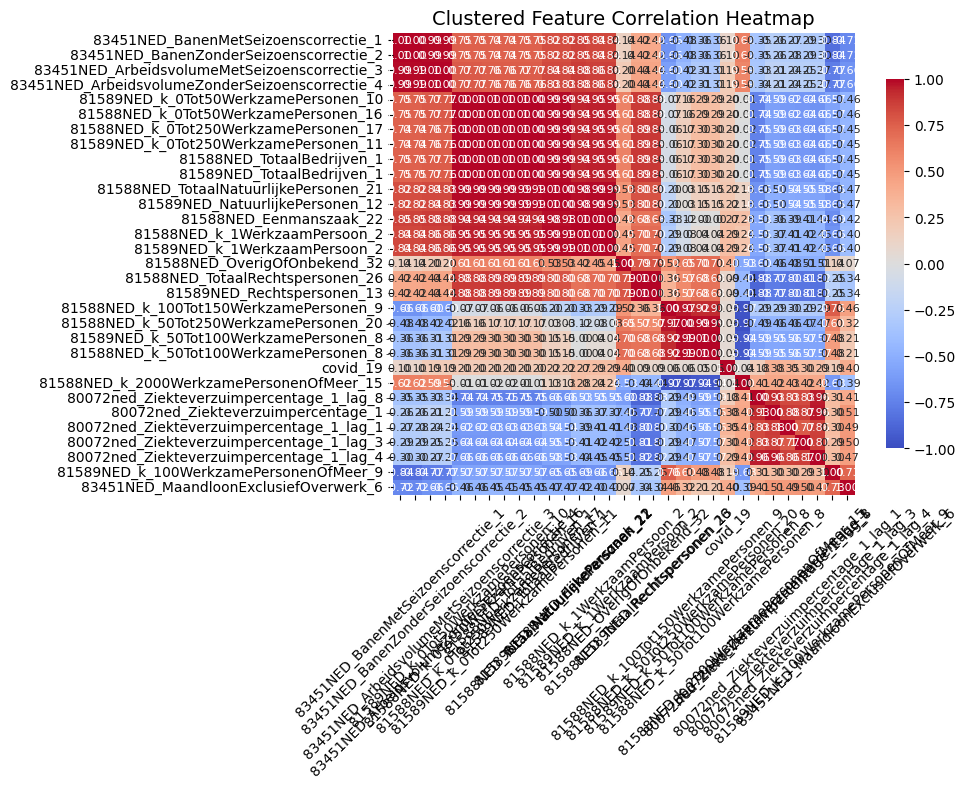

In [113]:
import scipy.cluster.hierarchy as sch

# Compute the correlation matrix for numeric columns
correlation_matrix = selected_df.select_dtypes(include='number').corr()

# Perform hierarchical clustering to order the correlation matrix
linkage = sch.linkage(correlation_matrix, method='ward')
dendrogram_order = sch.leaves_list(linkage)
ordered_corr_matrix = correlation_matrix.iloc[dendrogram_order, dendrogram_order]

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))  # Decrease the figure size

# Create a heatmap with seaborn
sns.heatmap(
    ordered_corr_matrix, 
    annot=True,        # Display correlation values
    cmap='coolwarm',   # Color scheme
    fmt='.2f',         # Format for correlation values
    vmin=-1, vmax=1,   # Range for correlation values
    square=True,       # Make cells square
    cbar_kws={"shrink": .8},  # Colorbar size
    annot_kws={"size": 8}  # Set annotation text size
)

# Add titles and labels
plt.title('Clustered Feature Correlation Heatmap', fontsize=14)
plt.xticks(fontsize=10, rotation=45)  # Adjust x-axis labels
plt.yticks(fontsize=10)              # Adjust y-axis labels
plt.show()


# VIF

In [112]:
# Function to calculate Variance Inflation Factor (VIF)
def calculate_vif(dataframe):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the dataframe.
    
    Parameters:
        dataframe (DataFrame): DataFrame containing numerical features.

    Returns:
        DataFrame: DataFrame with features and their corresponding VIF values.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [
        variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])
    ]
    return vif_data

# Select only numeric columns from the filtered DataFrame
numeric_columns = selected_df.select_dtypes(include='number')

# Calculate VIF for numeric columns
vif_df = calculate_vif(numeric_columns)

# Exclude rows with NaN or infinite VIF values
vif_df = vif_df[~vif_df['VIF'].isin([float('inf'), float('nan')])]

# Filter for columns with VIF <= 100
low_vif_df = vif_df[vif_df['VIF'] <= 100]

# Display columns with VIF <= 10
print("Features with VIF <= 10:")
print(low_vif_df)

# Filter the original DataFrame to retain only columns with VIF <= 10
selected_df_no_multicollinearity = df_filtered[low_vif_df['Feature']]

# Display updated DataFrame shape
print(f"Updated DataFrame shape after VIF filtering: {selected_df_no_multicollinearity.shape}")

Features with VIF <= 10:
                         Feature        VIF
6                       covid_19   4.273447
25  81588NED_OverigOfOnbekend_32  12.070831
Updated DataFrame shape after VIF filtering: (168, 2)


/Users/zelle/Documents/repos/uwv/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



# Time series analysis

In [115]:
df_timeseries = df_filtered[['BedrijfstakkenBranchesSBI2008'] + [col for col in df_filtered.columns if '80072ned_Ziekteverzuimpercentage_1' in col]]

# Define the industry column
industry_column = 'BedrijfstakkenBranchesSBI2008'

# Get the unique industries
industries = df_timeseries[industry_column].unique()

df_timeseries.head()

,BedrijfstakkenBranchesSBI2008,80072ned_Ziekteverzuimpercentage_1,80072ned_Ziekteverzuimpercentage_1_lag_1,80072ned_Ziekteverzuimpercentage_1_lag_2,80072ned_Ziekteverzuimpercentage_1_lag_3,80072ned_Ziekteverzuimpercentage_1_lag_4,80072ned_Ziekteverzuimpercentage_1_lag_5,80072ned_Ziekteverzuimpercentage_1_lag_6,80072ned_Ziekteverzuimpercentage_1_lag_7,80072ned_Ziekteverzuimpercentage_1_lag_8
Year_Quarter,,,,,,,,,,
2008-Q1,C Industrie,5.4,5.2,4.3,4.7,5.4,5.9,5.0,5.4,6.1
2008-Q1,G Handel,3.7,3.4,3.0,3.2,3.6,3.3,2.9,3.1,3.5
2008-Q1,Q Gezondheids- en welzijnszorg,6.0,5.3,4.4,5.1,5.9,5.4,4.5,5.2,6.0
2008-Q2,C Industrie,4.8,5.4,5.2,4.3,4.7,5.4,5.9,5.0,5.4
2008-Q2,G Handel,3.2,3.7,3.4,3.0,3.2,3.6,3.3,2.9,3.1


## ACF
This is an Autocorrelation Function (ACF) plot. Here’s how to interpret it:

Initial Observation:

The first bar (lag 0) is always 1, as it represents the autocorrelation of the series with itself.
Subsequent bars represent the correlation of the series with lagged versions of itself.
High Correlation at Specific Lags:

You see significant spikes at regular intervals (e.g., lags 1, 5, 9, 13, 17). This suggests a seasonal pattern in the data with a periodicity of approximately 4 lags.
Gradual Decline:

The values decline gradually (but not strictly exponentially). This could indicate a trend or non-stationarity in the data. The presence of a trend suggests the need for differencing to achieve stationarity before modeling.
Confidence Intervals (Shaded Region):

The blue shaded region represents the 95% confidence interval. Any spikes outside this region indicate statistically significant autocorrelations.
Spikes at lags like 1, 5, and so on are significant, reinforcing the idea of seasonality.
Key Takeaways for This Plot:
Seasonality:

Regular spikes suggest that the data exhibits seasonality. If this is quarterly data, the periodicity may align with yearly cycles (e.g., sales, weather, etc.).
Non-Stationarity:

The slow decay in autocorrelation suggests the presence of a trend, implying non-stationarity. You may need to apply differencing (e.g., first difference) to remove the trend and stabilize the mean.
Next Steps:

Check the Partial Autocorrelation Function (PACF) to determine the order of the AR component.
Consider applying seasonal differencing (e.g., SARIMA) to account for the observed periodicity.

## PACF
This is a Partial Autocorrelation Function (PACF) plot. Here’s how to interpret it and correlate it with the ACF plot you provided earlier:

Key Observations from the PACF Plot:
Lag 1 Spike:

The first significant spike is at lag 1, indicating a strong relationship between the current value and the value at lag 1.
This suggests that an AR(1) (AutoRegressive model of order 1) component may be useful in modeling.
Seasonal Pattern:

There are other significant spikes at lags such as 5, 9, and possibly 13, which align with the seasonal pattern observed in the ACF.
This reinforces the idea of seasonality with periodicity around 4 lags.
Decay:

Unlike the ACF, the PACF doesn't show gradual decay; instead, it drops to near zero after lag 1 (for non-seasonal components). This indicates that AR terms (rather than MA terms) are likely more relevant for the non-seasonal part of the model.
Confidence Intervals (Shaded Region):

Spikes within the blue region are not statistically significant. The significant spikes (outside this region) should guide the choice of AR terms and seasonal components.

## Next step
Based on this PACF plot, consider fitting an ARIMA model, starting with AR(1) for the non-seasonal part.
Use seasonal decomposition or additional diagnostics to confirm seasonal effects before adding seasonal components to the model.

<Figure size 1000x600 with 0 Axes>

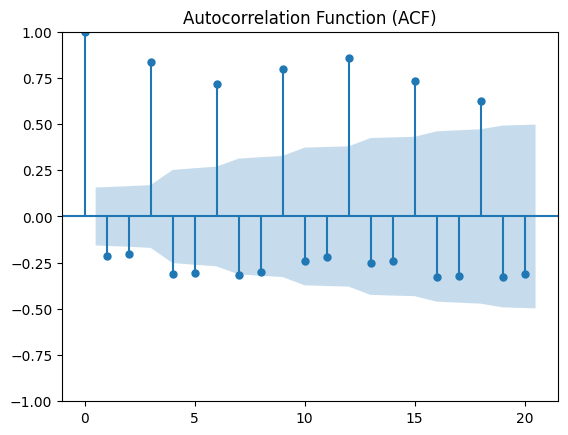

<Figure size 1000x600 with 0 Axes>

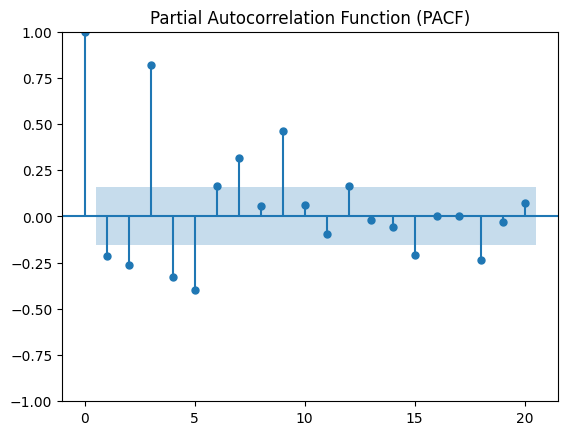

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Define the target variable
y = df_filtered['80072ned_Ziekteverzuimpercentage_1']  # Replace with your target variable column name

# Plot ACF and PACF
plt.figure(figsize=(10, 6))
plot_acf(y, lags=20, title='Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(y, lags=20, title='Partial Autocorrelation Function (PACF)')
plt.show()
